In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
# Parameters
LR = 0.01
epochs = 1000

In [3]:
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
print(train_X)

train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

print(train_Y)

n = len(train_X)
print(n)
print(np.shape(train_X))

[  3.3     4.4     5.5     6.71    6.93    4.168   9.779   6.182   7.59
   2.167   7.042  10.791   5.313   7.997   5.654   9.27    3.1  ]
[ 1.7    2.76   2.09   3.19   1.694  1.573  3.366  2.596  2.53   1.221
  2.827  3.465  1.65   2.904  2.42   2.94   1.3  ]
17
(17,)


In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
print(X)
W = (tf.Variable(tf.random_normal([n])))
B = tf.Variable(tf.random_normal([n]))
print(W)
print(B)

Tensor("Placeholder:0", dtype=float32)
<tf.Variable 'Variable:0' shape=(17,) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(17,) dtype=float32_ref>


In [5]:
pred = tf.add(tf.multiply(X,W),B)

In [6]:
cost = tf.reduce_sum(tf.pow((pred - Y),2))/(2*n)

optimizer = tf.train.GradientDescentOptimizer(LR).minimize(cost)

init = tf.global_variables_initializer()

Epoch: 0 Cost: 8.42841
Epoch: 50 Cost: 0.149206
Epoch: 100 Cost: 0.140076
Epoch: 150 Cost: 0.132047
Epoch: 200 Cost: 0.124989
Epoch: 250 Cost: 0.118787
Epoch: 300 Cost: 0.11334
Epoch: 350 Cost: 0.108559
Epoch: 400 Cost: 0.104365
Epoch: 450 Cost: 0.100688
Epoch: 500 Cost: 0.0974655
Epoch: 550 Cost: 0.0946442
Epoch: 600 Cost: 0.0921757
Epoch: 650 Cost: 0.0900178
Epoch: 700 Cost: 0.0881329
Epoch: 750 Cost: 0.0864884
Epoch: 800 Cost: 0.085055
Epoch: 850 Cost: 0.083807
Epoch: 900 Cost: 0.0827219
Epoch: 950 Cost: 0.0817799
Training Cost: 0.0809783 W = 0.292492 B = 0.49286


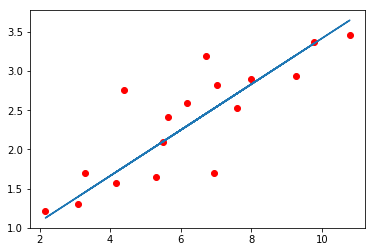

In [7]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        avg_cost = 0
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer, feed_dict =  {X :x,Y:y})
        
        if epoch % 50 == 0:
            c = sess.run(cost,feed_dict = {X:train_X,Y:train_Y})
            print("Epoch:",epoch,"Cost:",c)

    print("Training Cost:",sess.run(cost,feed_dict = {X : train_X,Y : train_Y}),"W =",sess.run(W[-1]),"B =",sess.run(B[-1]))
    
    plt.plot(train_X,train_Y,'ro')
    plt.plot(train_X, train_X * sess.run(W[-1]) + sess.run(B[-1]))